In [1]:
# Load dependencies/packages
import numpy as np # for array operations
import pandas as pd # for neat tables, database-like grouping/summary tables & csv_read
import matplotlib.pyplot as plt # for the occasional plot
import seaborn as sns # for the occasional plot
sns.set_theme(style="whitegrid")
from statsmodels.tsa.holtwinters import ExponentialSmoothing # for exponential smoothing (long-term trend analysis)
from dateutil.relativedelta import relativedelta # to perform datetime arithmetic i.e. subtracting months

In [2]:
# Load Data
base_data = pd.read_csv('data/melbourne_housing_full.csv', infer_datetime_format=True, parse_dates=['Date']) # load data

C:\Users\bradl\anaconda3\envs\study\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\bradl\anaconda3\envs\study\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\bradl\anaconda3\envs\study\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\bradl\anaconda3\envs\study\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/04/2016' in

In [3]:
base_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
base_data.shape

(34857, 21)

In [5]:
base_data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Latitude                float64
Longtitude              float64
RegionName               object
PropertyCount           float64
dtype: object

In [6]:
## Preliminary Data Cleaning ##
# Remove redudant data Address, SellerG (real estate agent who made the sale), Latitude, Longitude
clean_data = base_data.drop(columns=['Address', 'SellerG', 'Latitude', 'Longtitude']) # longitude is mispelled

# Response variable is house sale Price, therefore remove those data point with sale Price = NaN
#sum(clean_data['Price'].isna()) # 7610 data points
clean_data = clean_data.dropna(subset=['Price'])

In [7]:
clean_data.shape

(27247, 17)

In [8]:
print(clean_data.nunique())

Suburb            345
Rooms              12
Type                3
Price            2871
Method              5
Date               78
Distance          213
Postcode          209
Bedroom2           14
Bathroom           10
Car                13
Landsize         1557
BuildingArea      662
YearBuilt         151
CouncilArea        33
RegionName          8
PropertyCount     336
dtype: int64


In [9]:
print ('Remaining NaNs in columns (predictor variables)')
for name in list(clean_data.columns):
    print (name, "-", sum(clean_data[name].isna()))

Remaining NaNs in columns (predictor variables)
Suburb - 0
Rooms - 0
Type - 0
Price - 0
Method - 0
Date - 0
Distance - 1
Postcode - 1
Bedroom2 - 6441
Bathroom - 6447
Car - 6824
Landsize - 9265
BuildingArea - 16591
YearBuilt - 15163
CouncilArea - 3
RegionName - 3
PropertyCount - 3


In [10]:
# Remove NaNs from the following predictor variables based on the few NaNs detected above
# Other columns (predictor variables) with a high occurrence of NaNs will be encoded with dummy variables 
for name in ['Distance', 'Postcode', 'CouncilArea', 'RegionName', 'PropertyCount']:
    clean_data = clean_data.dropna(subset=[name])

In [11]:
print ('Remaining NaNs in columns (predictor variables)')
for name in list(clean_data.columns):
    print (name, "-", sum(clean_data[name].isna()))

Remaining NaNs in columns (predictor variables)
Suburb - 0
Rooms - 0
Type - 0
Price - 0
Method - 0
Date - 0
Distance - 0
Postcode - 0
Bedroom2 - 6438
Bathroom - 6444
Car - 6821
Landsize - 9262
BuildingArea - 16588
YearBuilt - 15160
CouncilArea - 0
RegionName - 0
PropertyCount - 0


In [12]:
# Also drop 'postcode' because it will create 209 dummy variables. It is int in appearance but not ordinal.
# There should be sufficient description of the local area via Suburb, CouncilArea, Area ...
# ... which will create 345 + 33 + 8 = 386 dummy variables. 
# Another 209 dummy variables describing local area is unrequired.
clean_data = clean_data.drop(columns=['Postcode'])

In [13]:
## Exploratory Data Analysis ##
clean_data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
count,27244.000000,2.724400e+04,27244.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,27244.000000
mean,2.992365,1.050210e+06,11.280634,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,7566.781089
std,0.954810,6.414923e+05,6.787580,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,4492.382418
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,4294.000000
50%,3.000000,8.700000e+05,10.500000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,6567.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,21650.000000


In [14]:
## Outlier removal that affects further EDA

# drop very large Landsize and BuildingArea because we are not interested in ...
# large Rural (i.e. Farming), Commercial or Industrial properties.
# We are interested in residential properties. For whatever reason, in the dataset there 
# are very large properties marked as being: # Type = h (house), u (unit/duplex) or t (townhouse)

# Set max landsize and building area to 10000 sq.m
clean_data = clean_data[(clean_data['Landsize'] <= 10000) & (clean_data['BuildingArea'] <= 10000)]

In [15]:
clean_data.describe()
# reduction from 27247 data points to 9366

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
count,9366.000000,9.366000e+03,9366.000000,9366.000000,9366.000000,9228.000000,9366.000000,9366.000000,9014.000000,9366.000000
mean,3.094384,1.095093e+06,11.157474,3.073884,1.647769,1.693975,487.439569,151.807051,1965.031839,7464.983558
std,0.961988,6.774594e+05,6.835822,0.964222,0.723268,0.970676,536.234387,135.124803,37.448979,4359.800271
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,389.000000
25%,2.000000,6.450000e+05,6.400000,2.000000,1.000000,1.000000,206.000000,100.000000,1940.000000,4380.000000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,467.000000,132.000000,1970.000000,6543.000000
75%,4.000000,1.350000e+06,13.900000,4.000000,2.000000,2.000000,650.000000,180.000000,2000.000000,10331.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,9838.000000,6791.000000,2019.000000,21650.000000


In [16]:
clean_data['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Melton City Council',
       'Maroondah City Council', 'Greater Dandenong City Council',
       'Nillumbik Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Casey City Council', 'Cardinia Shire Council',
       'Mitchell Shire Council', 'Moorabool Shire Council'], dtype=object)

In [17]:
month_ave_price = clean_data.groupby([pd.Grouper(key='Date', freq='M')]).agg(avg_sale_price=('Price', 'mean'))
month_ave_price # note some months are nan because there are no sales in some months
month_ave_price = month_ave_price.dropna()
month_ave_price

,avg_sale_price
Date,
2016-03-31,1.227647e+06
2016-04-30,1.028850e+06
2016-05-31,1.073312e+06
2016-06-30,1.030397e+06
2016-07-31,9.893010e+05
2016-08-31,1.086986e+06
2016-09-30,1.060961e+06
2016-10-31,1.181303e+06
2016-11-30,1.254948e+06


C:\Users\bradl\anaconda3\envs\study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bradl\anaconda3\envs\study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


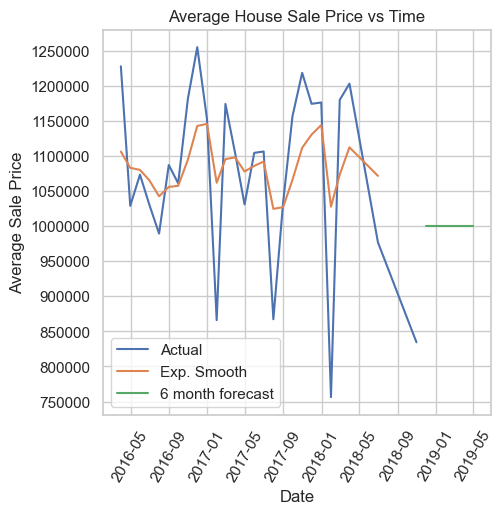

In [18]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
line = ax1.plot(month_ave_price) # plot monthly average sale price
exp_smooth_model = ExponentialSmoothing(month_ave_price).fit(smoothing_level=0.3, optimized=False)
exp_smooth_model_fit_values = exp_smooth_model.fittedvalues.shift(-1)
smooth_line = ax1.plot(exp_smooth_model_fit_values) # plot exp smoothed monthly average sale price
# prepare forecast 6 months past 2018-10-31
forecast_dates = np.array(['2018-11-30', '2018-12-31', '2019-01-31',
                           '2019-02-28', '2019-03-31', '2019-04-30'], dtype='datetime64[D]')
forecast = pd.DataFrame(exp_smooth_model.forecast(len(forecast_dates)))
forecast = forecast.set_index(forecast_dates)
forecast_line = ax1.plot(forecast) # plot exp smoothing forecast 6 months
plt.xticks(rotation=60)
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(np.arange(750000, 1300000, step=50000))
plt.title('Average House Sale Price vs Time')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
ax1.legend(['Actual', 'Exp. Smooth', '6 month forecast'])
plt.show()

In [19]:
def date_to_months(date_time):
    years = date_time.year*100 - 2016*100 # subtract 2016
    years_to_month = int(years/100 * 12)
    months = years_to_month + date_time.month
    return months

# it will return appropriate positive values for after 2015-12-31/2016-01-01 and negative values for before 

In [20]:
# At first glance, we see a general downward trend in average sale price, but ...
# ... after exponential smoothing is applied, this is likely to be noisy fluctuation.
# In saying that, there is no guarantee that in the long-term (with updated data for a longer time period) ...
# ... there will be no trend in average sale prices. Common knowledge and historical plots reveal that ...
# ... house prices have generally trended upward, following larger macro-economic trends.
# Therefore, it is necessary to introduce a variable that represents 'date of sale'.
# It is proposed to introduce a int/float variable that counts 'date of sale' from 2015-12-31, the date of model inception.
# This should allow any modeling the possibility of utilizing updated data.
clean_data['SaleDate_MonthsFrom2015EOY'] = clean_data['Date'].apply(date_to_months)

In [21]:
clean_data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount,SaleDate_MonthsFrom2015EOY
count,9366.000000,9.366000e+03,9366.000000,9366.000000,9366.000000,9228.000000,9366.000000,9366.000000,9014.000000,9366.000000,9366.000000
mean,3.094384,1.095093e+06,11.157474,3.073884,1.647769,1.693975,487.439569,151.807051,1965.031839,7464.983558,15.542494
std,0.961988,6.774594e+05,6.835822,0.964222,0.723268,0.970676,536.234387,135.124803,37.448979,4359.800271,7.495794
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,389.000000,3.000000
25%,2.000000,6.450000e+05,6.400000,2.000000,1.000000,1.000000,206.000000,100.000000,1940.000000,4380.000000,9.000000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,467.000000,132.000000,1970.000000,6543.000000,16.000000
75%,4.000000,1.350000e+06,13.900000,4.000000,2.000000,2.000000,650.000000,180.000000,2000.000000,10331.000000,21.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,9838.000000,6791.000000,2019.000000,21650.000000,34.000000


In [22]:
#clean_data.dtypes

In [23]:
# frequency of predictor variable occurrence
print(clean_data.groupby('CouncilArea').count()['Price'])
print('')
print(clean_data.groupby('RegionName').count()['Price'])

CouncilArea
Banyule City Council              427
Bayside City Council              379
Boroondara City Council           840
Brimbank City Council             430
Cardinia Shire Council             12
Casey City Council                 38
Darebin City Council              766
Frankston City Council             93
Glen Eira City Council            550
Greater Dandenong City Council     53
Hobsons Bay City Council          317
Hume City Council                 410
Kingston City Council             218
Knox City Council                 107
Macedon Ranges Shire Council        9
Manningham City Council           281
Maribyrnong City Council          515
Maroondah City Council            113
Melbourne City Council            511
Melton City Council               111
Mitchell Shire Council              5
Monash City Council               306
Moonee Valley City Council        580
Moorabool Shire Council             1
Moreland City Council             672
Nillumbik Shire Council            28


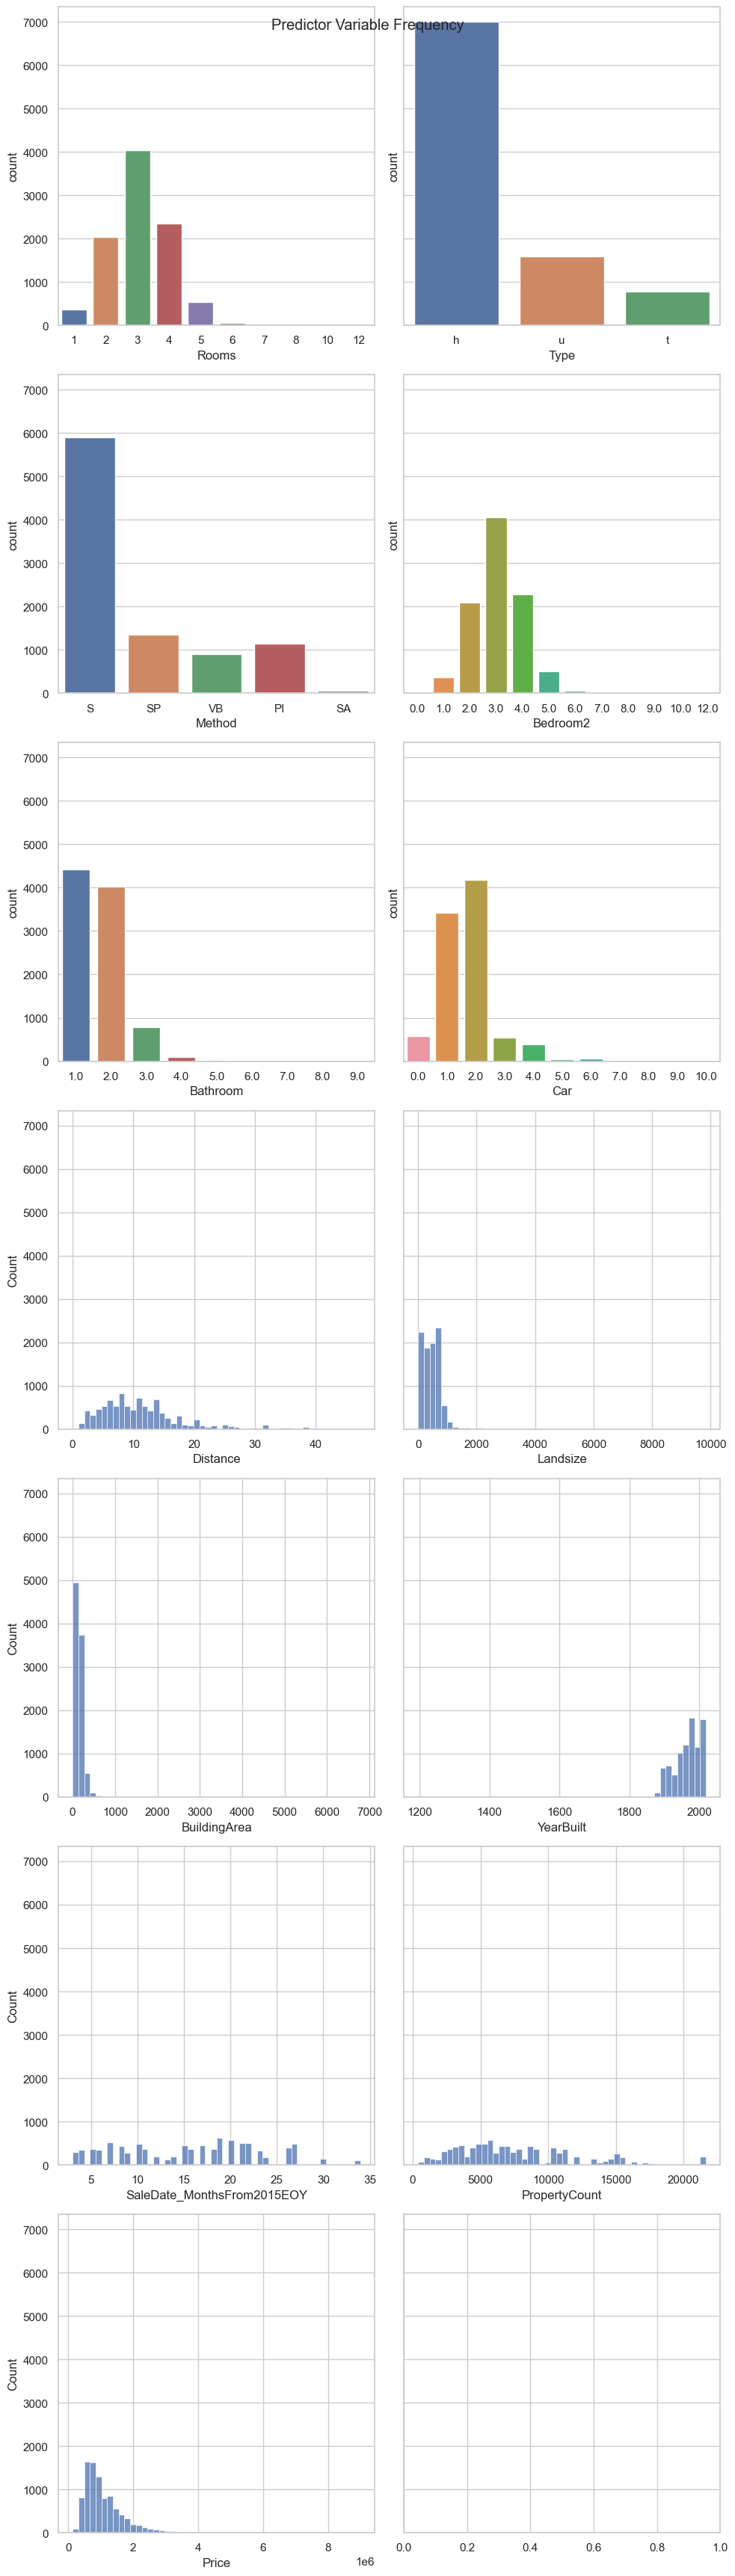

In [24]:
# frequency of variable occurrence
count_fig_var_list = ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car'] 
# binary, categorical pred vars or float/int pred vars with small ranges 

histogram_fig_var_list = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 
                          'SaleDate_MonthsFrom2015EOY', 'PropertyCount', 'Price'] 
# int or float pred vars with large ranges

row_num = 7
col_num = 2
fig, ax = plt.subplots(row_num, col_num, figsize=(10, 35), sharey=True)
fig.suptitle('Predictor Variable Frequency')

for i, var in enumerate(count_fig_var_list):
    sns.countplot(x=clean_data[var], ax=ax[np.floor(i/col_num).astype(int), i%col_num])

i_last = i + 1 # continue indexing on next row

for i, var in enumerate(histogram_fig_var_list):
    i = i_last + i
    sns.histplot(x=clean_data[var], bins=50, ax=ax[np.floor(i/col_num).astype(int), i%col_num])

fig.tight_layout(pad=1.08)
plt.show()

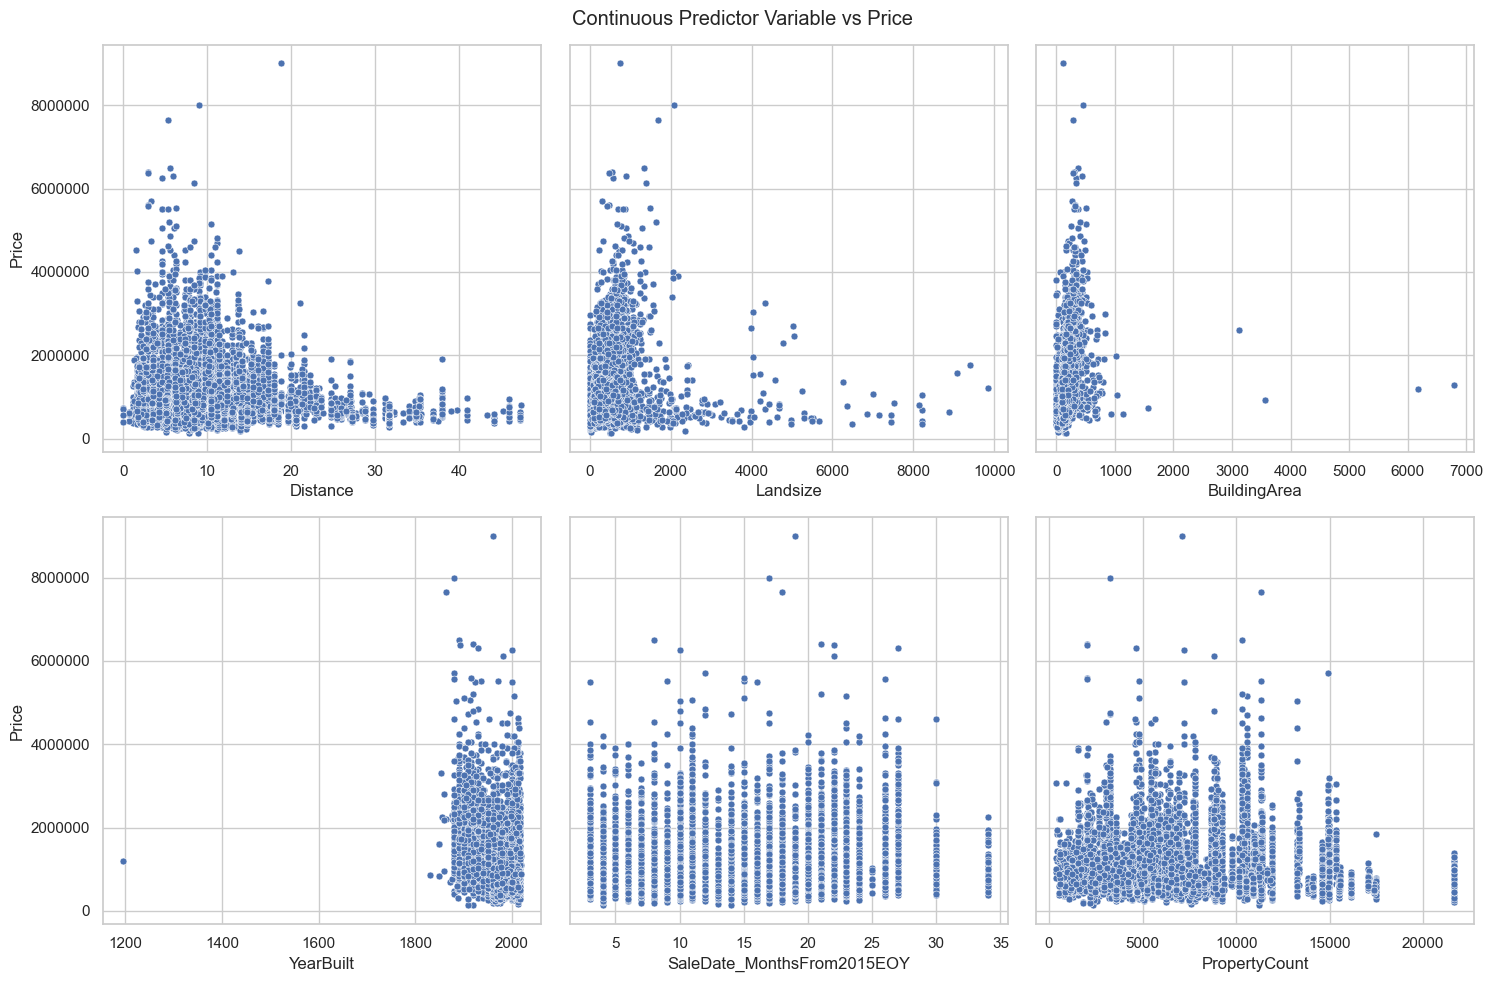

In [25]:
# Continuous pred vars vs Sale Price
cts_fig_var_list = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'SaleDate_MonthsFrom2015EOY', 'PropertyCount'] 
# int or float pred vars with large ranges

row_num = 2
col_num = 3
fig, ax = plt.subplots(row_num, col_num, figsize=(15, 10), sharey=True)
fig.suptitle('Continuous Predictor Variable vs Price')
for i, var in enumerate(cts_fig_var_list):
    sns.scatterplot(clean_data, x=var, y='Price', s=25, ax=ax[np.floor(i/col_num).astype(int), i%col_num])  
    plt.ticklabel_format(axis='y', style='plain')
    
fig.tight_layout(pad=1.08)
plt.show()

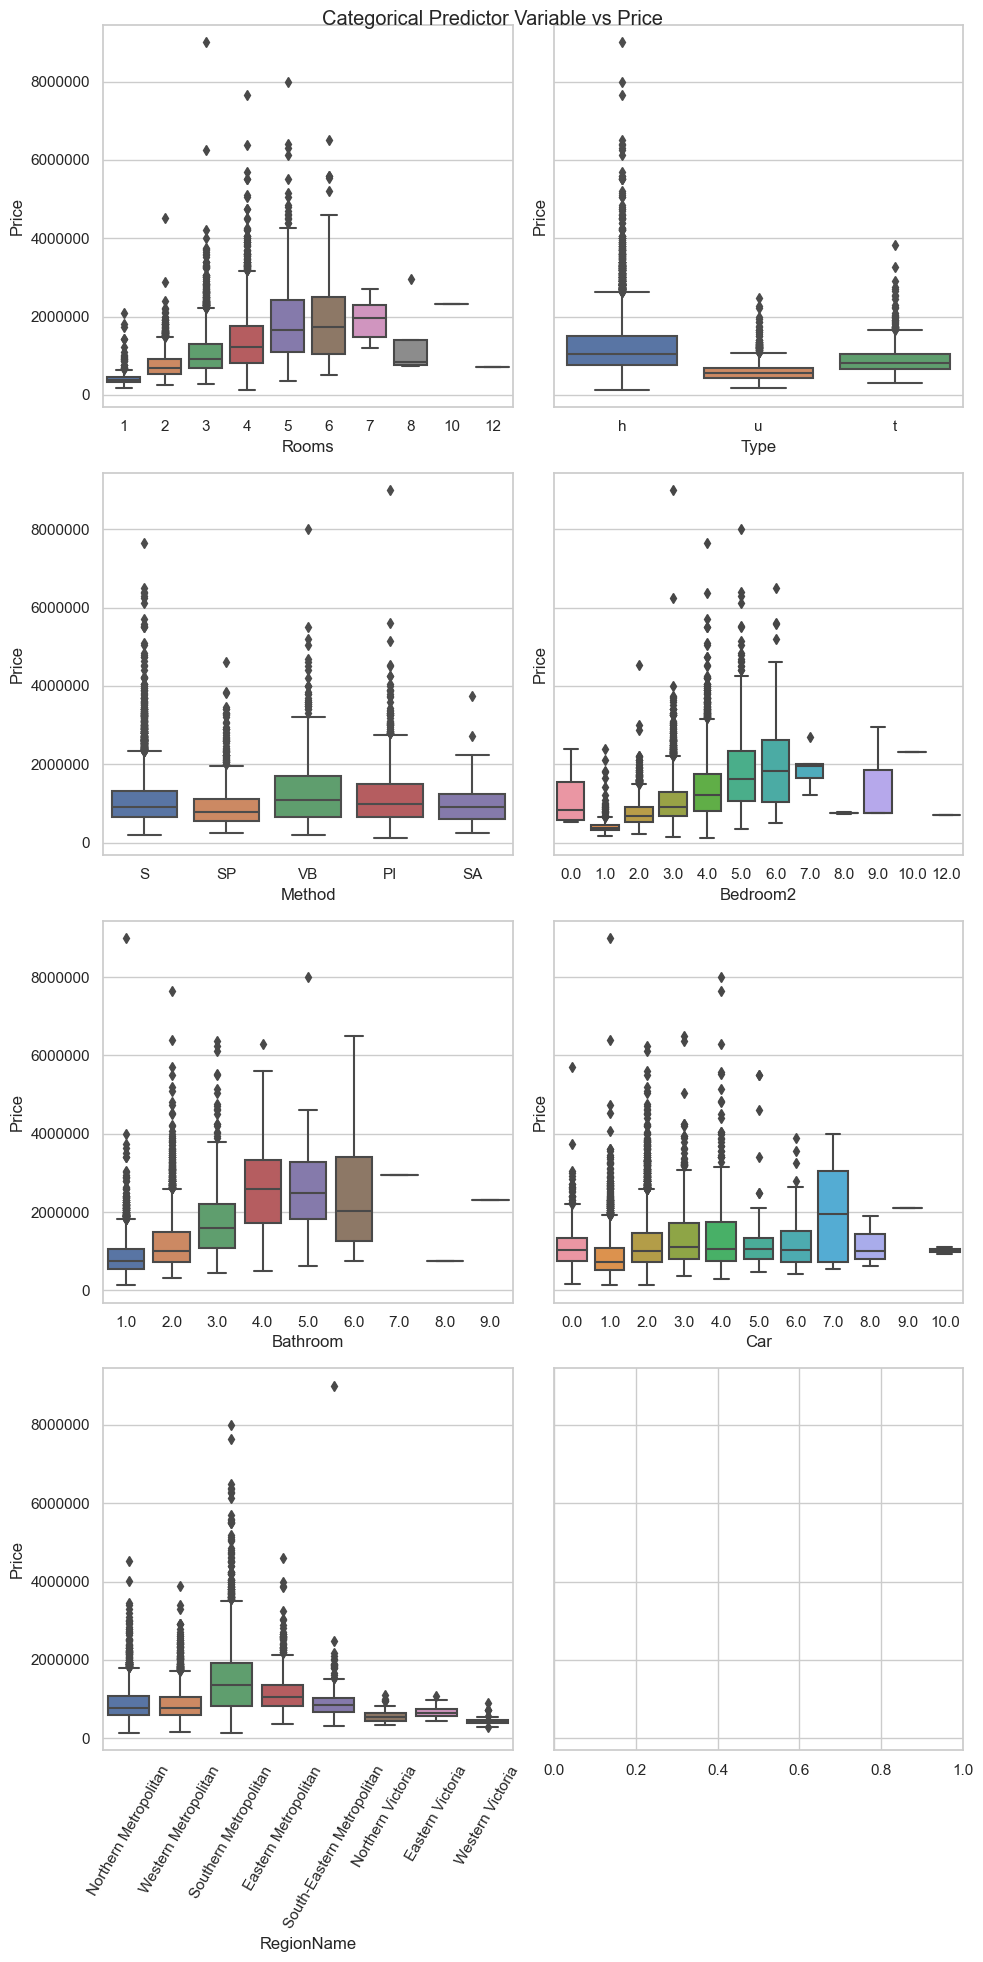

In [26]:
##### Categorical pred vars vs Sale Price
cat_fig_var_list = ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'RegionName'] 
# binary, categorical pred vars or float/int pred vars with small ranges 

row_num = 4
col_num = 2
fig, ax = plt.subplots(row_num, col_num, figsize=(10, 20), sharey=True)
fig.suptitle('Categorical Predictor Variable vs Price')
for i, var in enumerate(cat_fig_var_list):
    sns.boxplot(clean_data, x=var, y='Price', ax=ax[np.floor(i/col_num).astype(int), i%col_num])
    plt.ticklabel_format(axis='y', style='plain')       

plt.sca(ax[3,0]) # apply xtick rotation to last boxplot for 'RegionName'
plt.xticks(rotation=60) 

fig.tight_layout(pad=1.08)
plt.show()

In [27]:
# Post-EDA Outlier Removal 
# Remove data point YearBuilt = 1196
clean_data = clean_data.drop(clean_data[clean_data['YearBuilt']==1196].index)

# Set max building area to 2000 sq.m (removing 4 outliers) and max price to $7mil AUD (removing 3 outliers)
clean_data = clean_data[(clean_data['BuildingArea'] <= 2000)
                        & (clean_data['Price'] <= 7000000)]

clean_data.describe()
# now earliest built date is 1830 and latest is 2019, max

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount,SaleDate_MonthsFrom2015EOY
count,9358.000000,9.358000e+03,9358.000000,9358.000000,9358.000000,9220.000000,9358.000000,9358.000000,9009.000000,9358.000000,9358.000000
mean,3.093823,1.092626e+06,11.158015,3.073306,1.647254,1.693167,486.762663,149.733228,1965.143523,7465.268647,15.541355
std,0.961791,6.653712e+05,6.837306,0.964016,0.722365,0.969710,535.511317,86.540056,36.542466,4360.365111,7.496139
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,389.000000,3.000000
25%,2.000000,6.450000e+05,6.400000,2.000000,1.000000,1.000000,206.000000,100.000000,1940.000000,4380.000000,9.000000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,467.000000,132.000000,1970.000000,6543.000000,16.000000
75%,4.000000,1.350000e+06,13.900000,4.000000,2.000000,2.000000,650.000000,180.000000,2000.000000,10331.000000,21.000000
max,12.000000,6.500000e+06,47.400000,12.000000,9.000000,10.000000,9838.000000,1561.000000,2019.000000,21650.000000,34.000000


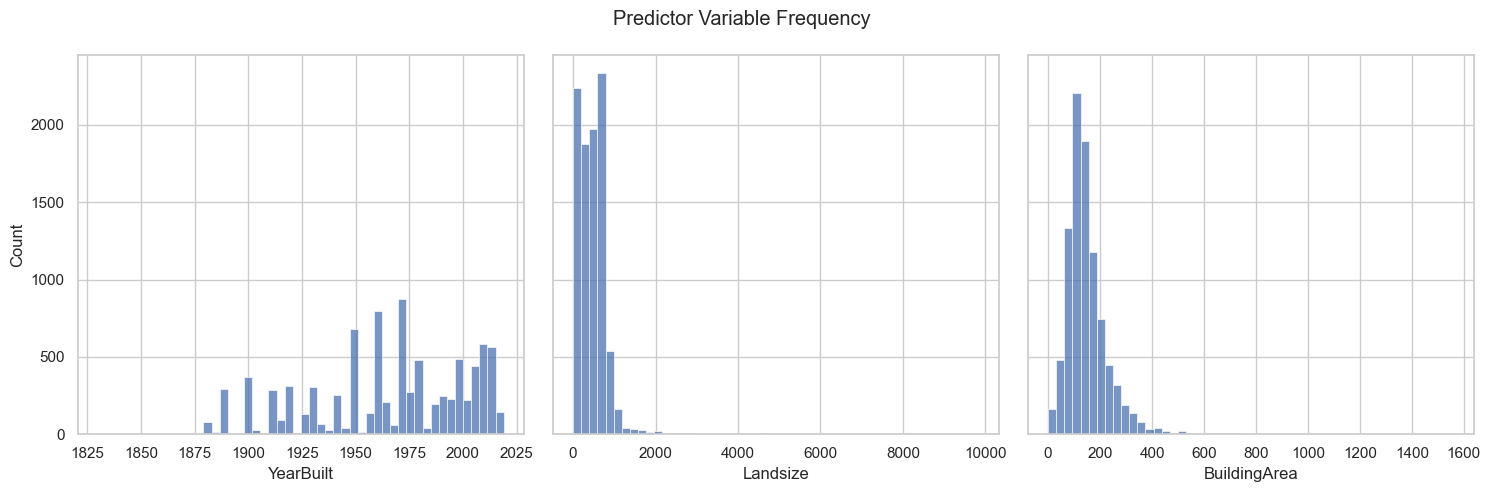

In [28]:
# Re-plot histogram distributions that benefit from outlier removal
new_fig_var_list = ['YearBuilt', 'Landsize', 'BuildingArea'] 

row_num = 1
col_num = 3
fig, ax = plt.subplots(row_num, col_num, figsize=(15, 5), sharey=True)
fig.suptitle('Predictor Variable Frequency')

for i, var in enumerate(new_fig_var_list):
    sns.histplot(x=clean_data[var], bins=50, ax=ax[i])

fig.tight_layout(pad=1.08)
plt.show()

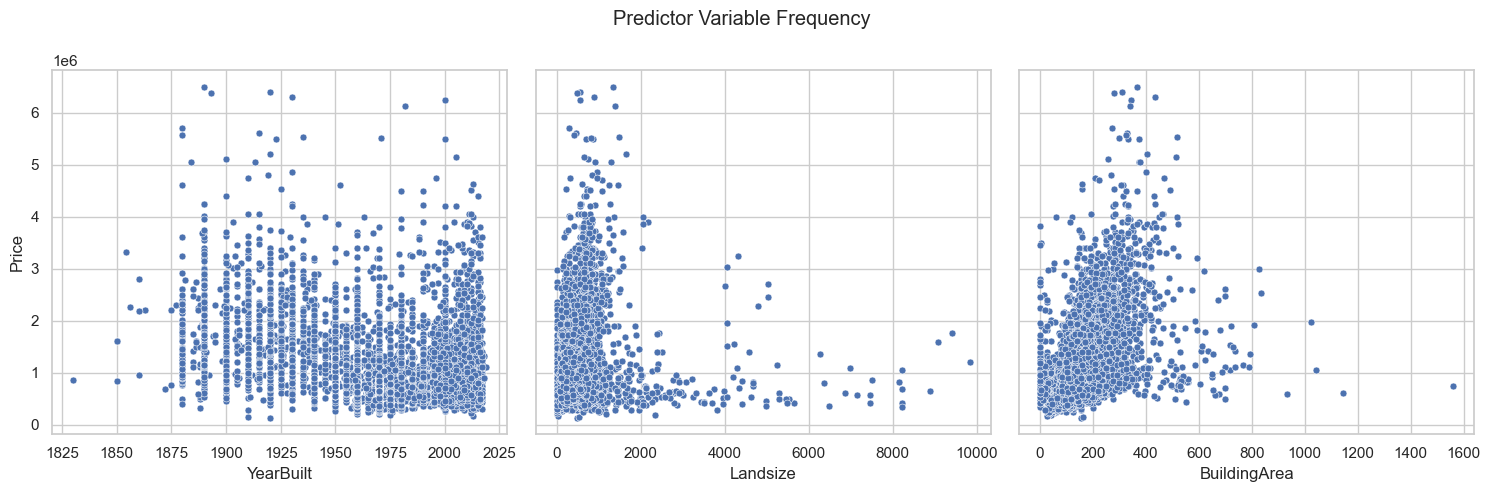

In [29]:
# Re-plot price distributions that benefit from outlier removal
new_fig_var_list = ['YearBuilt', 'Landsize', 'BuildingArea'] 

row_num = 1
col_num = 3
fig, ax = plt.subplots(row_num, col_num, figsize=(15, 5), sharey=True)
fig.suptitle('Predictor Variable Frequency')

for i, var in enumerate(new_fig_var_list):
    sns.scatterplot(clean_data, x=var, y='Price', s=25, ax=ax[i])

fig.tight_layout(pad=1.08)
plt.show()

In [30]:
## Dummy Variable creation ##
clean_data.dtypes

Suburb                                object
Rooms                                  int64
Type                                  object
Price                                float64
Method                                object
Date                          datetime64[ns]
Distance                             float64
Bedroom2                             float64
Bathroom                             float64
Car                                  float64
Landsize                             float64
BuildingArea                         float64
YearBuilt                            float64
CouncilArea                           object
RegionName                            object
PropertyCount                        float64
SaleDate_MonthsFrom2015EOY             int64
dtype: object

In [31]:
# Dummy var creation for float/int predictor variables with NaNs
# NaN counts:
# Bedroom2 - 6438
# Bathroom - 6444
# Car - 6821
# Landsize - 9262
# BuildingArea - 16588
# YearBuilt - 15160

clean_data.insert(8, 'Bedroom2_nan', clean_data['Bedroom2'].isnull())
clean_data.insert(10, 'Bathroom_nan', clean_data['Bathroom'].isnull())
clean_data.insert(12, 'Car_nan', clean_data['Car'].isnull())
clean_data.insert(14, 'Landsize_nan', clean_data['Landsize'].isnull())
clean_data.insert(16, 'BuildingArea_nan', clean_data['BuildingArea'].isnull())
clean_data.insert(18, 'YearBuilt_nan', clean_data['YearBuilt'].isnull())

# Dummy variable creation for object classes (Suburb, Type, CouncilArea, RegionName)
clean_data = pd.get_dummies(clean_data)

In [32]:
clean_data.shape # 9358, 383 columns (many dummy variables introduced from Suburb and CouncilArea)

(9358, 383)

In [33]:
corr_var_list = ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Bedroom2', 'Bathroom',
                 'Car', 'Distance','Landsize', 'BuildingArea', 'YearBuilt', 'SaleDate_MonthsFrom2015EOY',
                 'Method_S', 'Method_SP', 'Method_VB', 'Method_PI', 'Method_SA',
                 'RegionName_Eastern Metropolitan', 'RegionName_Eastern Victoria',
                 'RegionName_Northern Metropolitan','RegionName_Northern Victoria',
                 'RegionName_South-Eastern Metropolitan', 'RegionName_Southern Metropolitan',
                 'RegionName_Western Metropolitan', 'RegionName_Western Victoria',
                 'Price']
clean_data_corr = clean_data[corr_var_list].corr()

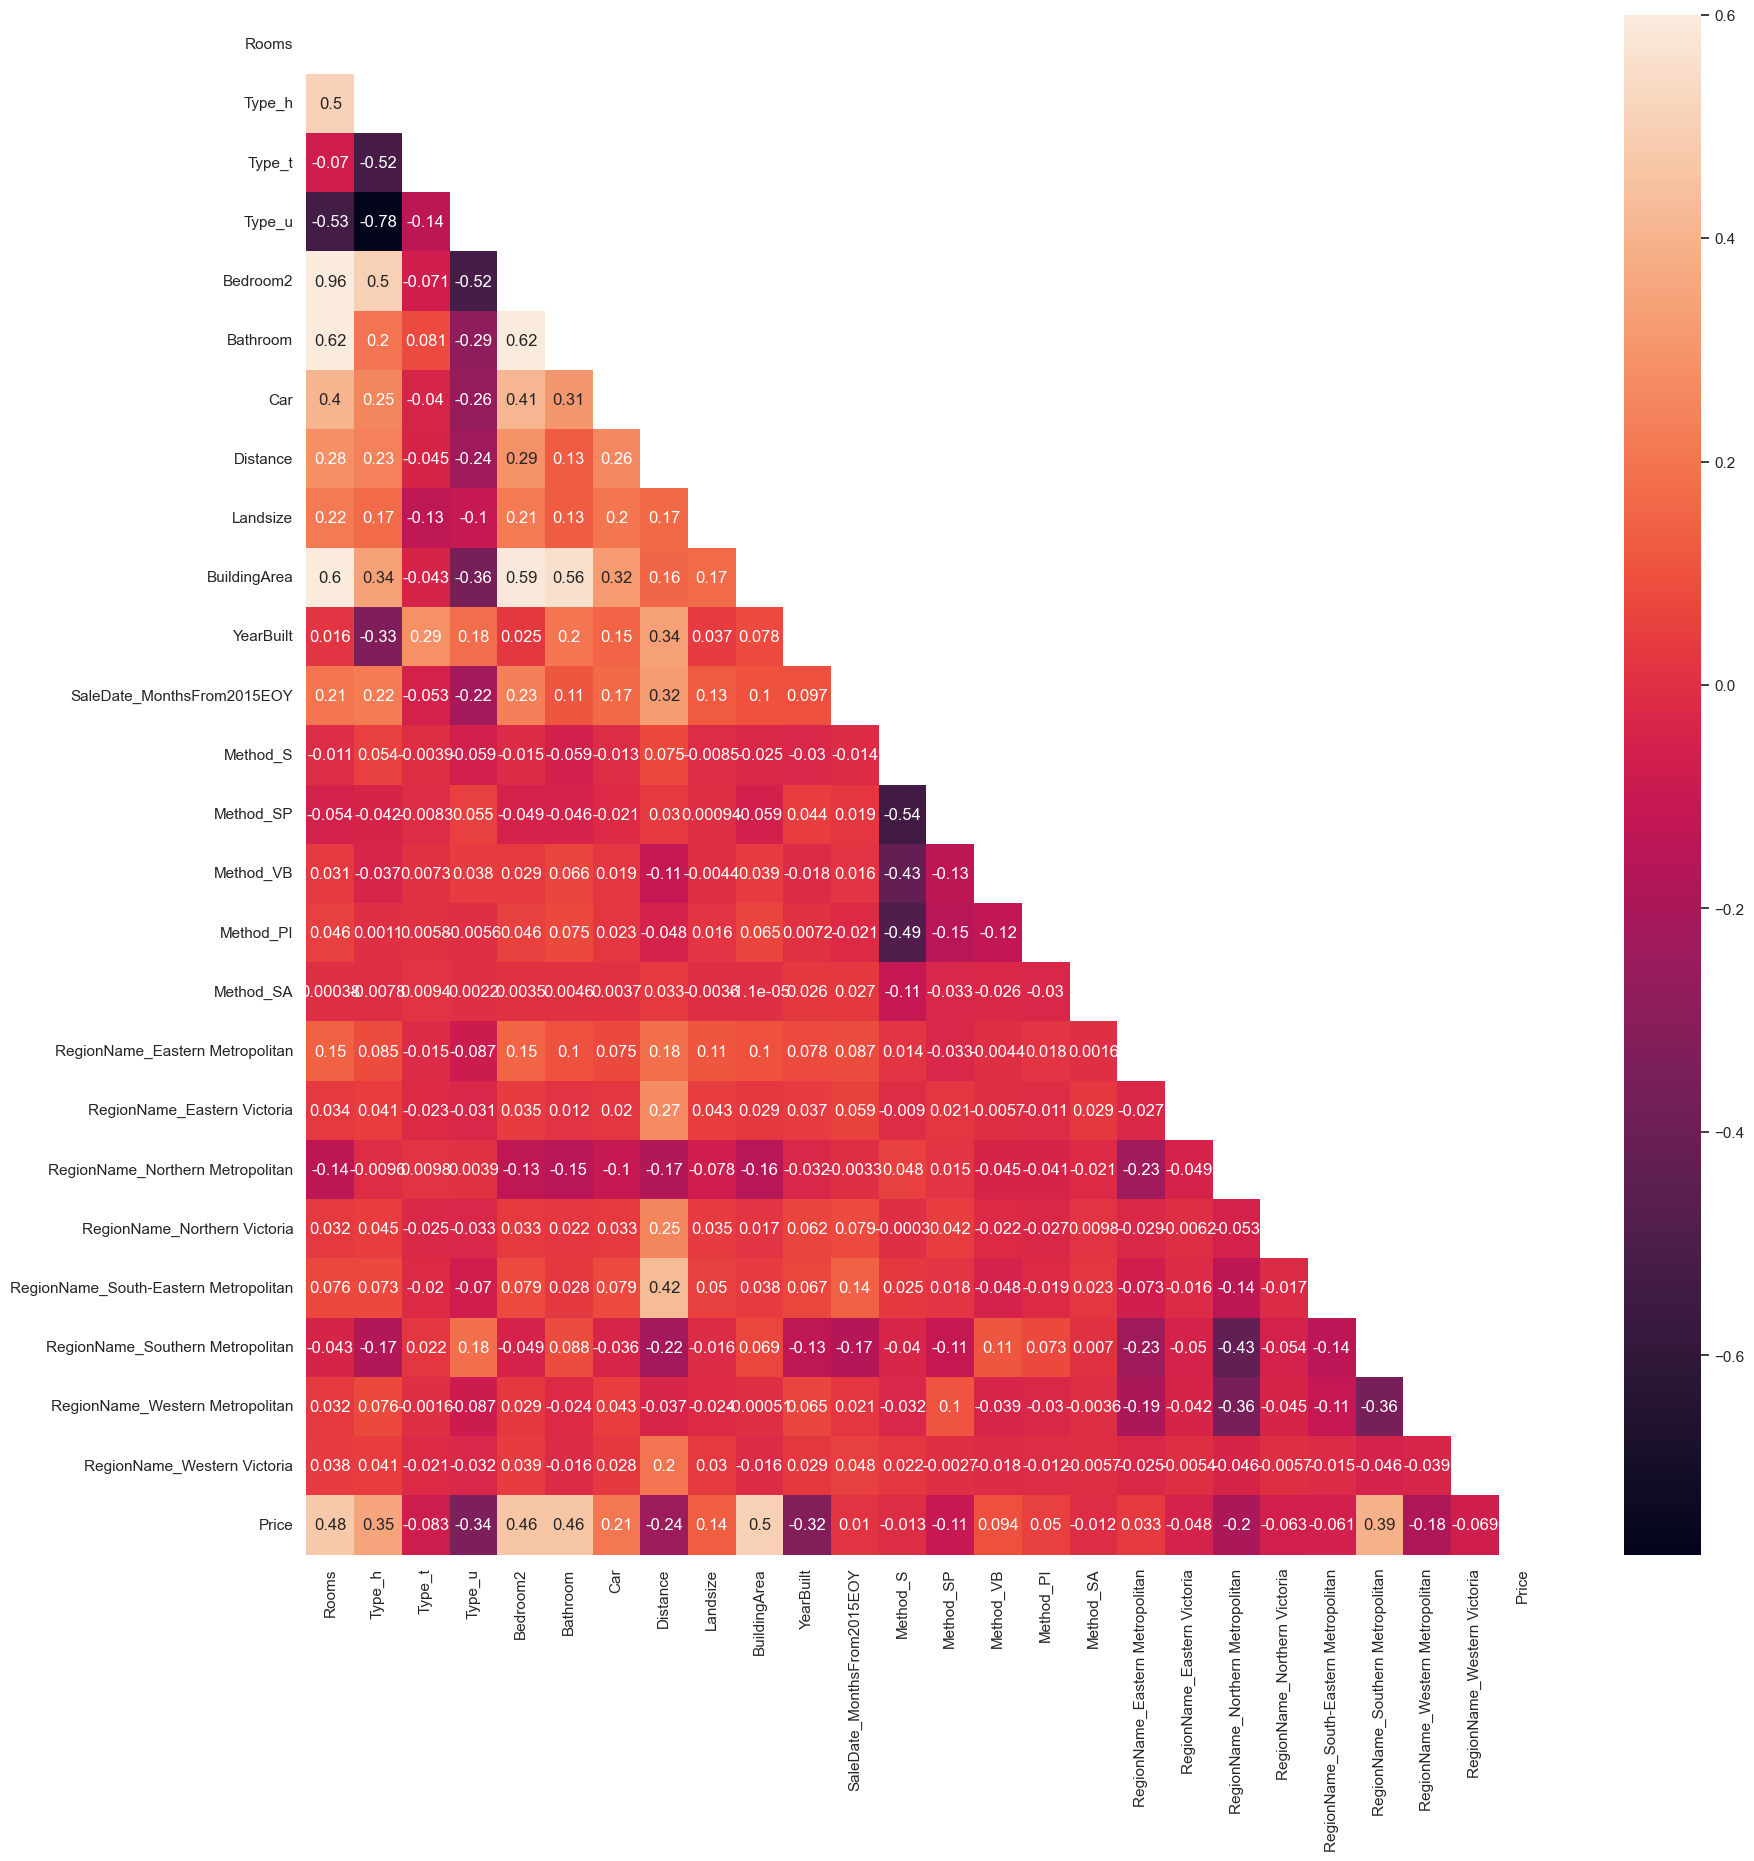

In [34]:
mask = np.triu(np.ones_like(clean_data_corr)) # add a mask
plt.figure(figsize=(20, 20))
sns.heatmap(clean_data_corr, vmax=0.6, annot=True, mask=mask)
plt.show()  

In [35]:
# Drop 'Method' as sales method has poor correlation with price and other non-Method predictors.
# Distributions of 'Method' appear 'fairly' uniform.
clean_data = clean_data.drop(columns=['Method_S', 'Method_SP', 'Method_VB', 'Method_PI', 'Method_SA'])

In [36]:
# For one-pass non-time series modeling, it is necessary to select a most recent time period...
# ...to utilize data for. This enables modeling to workaround any long-term trends in the data.
# For example, most recent 3-month, 6-month, 12-month, 18-month, 24-month and 36-month data.

# The end of the data set is 2018-10, so let's develop models for the whole data set i.e. 36-months, ...
# ... as well as 24-months and 12-months

In [37]:
# latest date of sale
latest_date = max(clean_data['Date'])

# cut off dates for data periods
cut_off_12mth = latest_date - relativedelta(months=12, days=1)
cut_off_24mth = latest_date - relativedelta(months=24, days=1)
cut_off_36mth = latest_date - relativedelta(months=36, days=1)

# create data sets for most recent 6 month, 12 month and 24 month data
melb_prop_data_12mth = clean_data[clean_data['Date'] > cut_off_12mth]
melb_prop_data_24mth = clean_data[clean_data['Date'] > cut_off_24mth]
melb_prop_data_36mth = clean_data[clean_data['Date'] > cut_off_36mth]

In [38]:
#inspect data sets
# melb_prop_data_12mth
# melb_prop_data_24mth
# melb_prop_data_36mth

In [39]:
#output data 12-month
compression_opts = dict(method='zip',
                        archive_name='melb_house_12mth.csv')
melb_prop_data_12mth.to_csv('melb_house_12mth.zip', index=False,
          compression=compression_opts)

In [40]:
#output data 24-month
compression_opts = dict(method='zip',
                        archive_name='melb_house_24mth.csv')
melb_prop_data_24mth.to_csv('melb_house_24mth.zip', index=False,
          compression=compression_opts)

In [41]:
#output data 36-month
compression_opts = dict(method='zip',
                        archive_name='melb_house_36mth.csv')
melb_prop_data_36mth.to_csv('melb_house_36mth.zip', index=False,
          compression=compression_opts)